In [1]:
import numpy as np
import pandas as pd

In [4]:
data = pd.read_csv("/Data2/Arun-UAV/NLP/vision_halu/haloc/train_dataset/caption/tp_test.csv")

In [5]:
data.head()

,Unnamed: 0,image_id,prompt,hallucinated_text,source_text,source_metadata,qa_metadata,qa_ids,annotations,id,split
0,64796,2391368,<image>Can you describe the main features of t...,"In this image, there are some boxes that conta...","In this image, there are some boxes contains f...","{'source': 'localized_narratives', 'id': 'sp_2...",[],['001006084'],"{'object': [], 'attribute': [{'attribute': {'n...",caption_4,test
1,64797,2375207,<image>Write a detailed description of the giv...,A man is wearing a white uniform. He is wearin...,A man is wearing a white uniform. He is wearin...,"{'source': 'stanford', 'id': 'sp_30231'}",[],['001021520'],"{'object': [], 'attribute': [{'attribute': {'n...",caption_11,test
2,64798,2351441,<image>Analyze the image in a comprehensive an...,there are three people on skis. they are treck...,there are three people on skis. they are treck...,"{'source': 'stanford', 'id': 'sp_26758'}",[],"['00116341', '00116312']","{'object': [{'obj': {'name': 'motorcycle', 'ch...",caption_38,test
3,64799,2382256,<image>Explain the visual content of the image...,This is the dog sitting on the floor. Here is ...,This is the dog sitting on the floor. Here is ...,"{'source': 'localized_narratives', 'id': 'sp_2...",[],['00141230'],"{'object': [], 'attribute': [{'attribute': {'n...",caption_42,test
4,64800,2386140,<image>What's happening in the scene?,A white kite with a green streamer is flying i...,A white kite with a green streamer is flying i...,"{'source': 'stanford', 'id': 'sp_32416'}",[],['00149629'],"{'object': [], 'attribute': [{'attribute': {'n...",caption_47,test


In [2]:
data = pd.read_csv("/Data2/Arun-UAV/NLP/vision_halu/haloc/haloc_extension/caption/gemini_labeled_28k.csv")

In [3]:
data.head(2)

,image_id,question,answer,candidates,hallucination_candidates,candidates_inx,hallucination_candidates_inx,image_path,question_id
0,2381430.jpg,What do you think is going on in this snapshot?,In this picture we can see one woman is holdin...,"['holding', 'playing', 'fencing', 'tennis', 'b...",['bat'],"{'holding': [(40, 47)], 'playing': [(58, 65)],...","{'bat': [(50, 53)]}",/Data2/Arun-UAV/NLP/vision_halu/visual_genome/...,10850c51-bdb5-4a1d-9739-a72f955e84a7
1,2381430.jpg,What do you think is going on in this snapshot?,In this picture we can see one woman is holdin...,"['ground', 'holding', 'playing', 'fencing', 't...","['frisbee', 'bat']","{'ground': [(114, 120)], 'holding': [(40, 47)]...","{'frisbee': [(99, 106)], 'bat': [(50, 53)]}",/Data2/Arun-UAV/NLP/vision_halu/visual_genome/...,78581d22-2e82-439a-987f-2504e3642904


In [ ]:
from transformers import AutoTokenizer

def spans_to_token_indices(tokenizer, text, spans):
    """
    Map character-level spans to token index spans after tokenization.
    spans: list of (start_char, end_char) with end exclusive.
    Returns list of (tok_start, tok_end) inclusive in the tokenized sequence (with special tokens).
    """
    enc = tokenizer(
        text,
        add_special_tokens=True,
        return_offsets_mapping=True  # not strictly required for char_to_token, but useful for debug
    )

    results = []
    for (start_char, end_char) in spans:
        # Map to token indices (inclusive)
        tok_start = enc.char_to_token(start_char)
        tok_end   = enc.char_to_token(end_char - 1)

        # If either is None, try to nudge inward/outward a bit (rare, but can happen around spaces)
        if tok_start is None:
            # Move forward until we hit a mappable character or run out
            i = start_char
            while i < end_char and tok_start is None:
                i += 1
                tok_start = enc.char_to_token(i)
        if tok_end is None:
            # Move backward until we hit a mappable character or run out
            i = end_char - 1
            while i >= start_char and tok_end is None:
                i -= 1
                tok_end = enc.char_to_token(i)

        # Final fallback: if still None, the span didn’t map to any token (e.g., only spaces/punct removed)
        if tok_start is None or tok_end is None:
            results.append((None, None))
        else:
            results.append((tok_start, tok_end))
    return enc, results

# # --- Example ---
# # Choose any fast tokenizer; BERT shown here.
# tok = AutoTokenizer.from_pretrained("bert-base-uncased", use_fast=True)



# enc, token_spans = spans_to_token_indices(tok, text, spans)

# print(enc.input_ids)         # includes [CLS] ... [SEP]
# print(token_spans)           # e.g., [(1,1), (4,6), (7,7)] depending on subword splits


/home/user/.conda/envs/shdm/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [13]:
from transformers import AutoTokenizer

# model_path = "liuhaotian/llava-v1.5-7b"
# tokenizer = AutoTokenizer.from_pretrained(model_path, use_fast=False)

/home/user/.conda/envs/shdm/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
sen = data["answer"].iloc[0]

In [11]:
tokenizer.decode(tokenizer(sen)["input_ids"])

'<s> In this picture we can see one woman is holding a bat and playing tennis. Back side, we can see fencing.'

In [14]:
text = "USER: Hello ASSISTANT: How are you ASSISTANT: fine"
token = "ASSISTANT"

# Find the first index of the token
text.find(token)

12

In [18]:
text[:12]

'USER: Hello '

In [15]:

model_name = "liuhaotian/llava-v1.5-7b"

# ✅ Force fast tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_name, use_fast=True, padding_side="left")

/home/user/.conda/envs/shdm/lib/python3.10/site-packages/huggingface_hub/file_download.py:945: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [16]:
res = tokenizer(text, return_tensors="pt")

In [17]:
res["input_ids"].dtype

torch.int64

In [ ]:
res

In [11]:
import pandas as pd
from collections import Counter

# Sample DataFrame
df = pd.DataFrame({
    "token": ["bat", "holding", "one", "playing", "tennis", "side", "woman", "back", "fencing"],
    "mat_tokens": [[155], [153], [150], [157], [158], [161], [151], [160], [166, 167]],
    "label": [-1, 1, 1, 1, 1, 1, 1, 1, 1]
})

# Step 1: explode mat_tokens so each token ID gets its own row
exploded = df.explode("mat_tokens")

# Step 2: group by mat_token id and compute majority label
def majority_label(labels):
    counts = Counter(labels)
    return counts.most_common(1)[0][0]

mapping = (exploded.groupby("mat_tokens")["label"].apply(majority_label).to_dict())


In [14]:
mapping

{150: 1,
 151: 1,
 153: 1,
 155: -1,
 157: 1,
 158: 1,
 160: 1,
 161: 1,
 166: 1,
 167: 1}

In [1]:
import torch

# Example tensor
t = torch.tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])
print("Original:", t)

# Position and new values
idx = 3                 # position to replace (value 4)
new_values = torch.tensor([20, 50, 100])

# Create new tensor
result = torch.cat([t[:idx], new_values, t[idx+1:]])
print("Updated:", result)


Original: tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])
Updated: tensor([  1,   2,   3,  20,  50, 100,   5,   6,   7,   8,   9])


Original batch shape: torch.Size([2, 8])
Expanded batch shape: torch.Size([2, 383])


In [3]:
main_tensor = torch.tensor([1, 2, 3, 4, 5])
insert_tensor = torch.tensor([99, 100])
position = 2  # insert before index 2 (i.e., between 2 and 3)

# ✅ Insert using torch.cat
result = torch.cat((main_tensor[:position], insert_tensor, main_tensor[position:]))

In [3]:
import torch
tensor = torch.full((5,), -200)
tensor

tensor([-200, -200, -200, -200, -200])

In [5]:
a = torch.tensor([1, 2, 3, 4, 5])

In [9]:
torch.where(a == 2)[0].tolist()[0]

1

In [28]:
import pandas as pd
df  = pd.read_json("/Data2/Arun-UAV/NLP/vision_halu/haloc/embeddings/caption/llava_24/batch_4eec170b-1c8f-4bc1-b4c8-747a7d60b263.jsonl", lines=True, orient='records')

In [4]:
from torch import nn
class HaluDetectionHead30(nn.Module):
    def __init__(self, input_dim=4096, hidden_dim=1024, num_classes=3, dropout_p=0.3):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout_p),
            nn.Linear(hidden_dim, num_classes)
        )

    def forward(self, x):
        return self.net(x)

head = HaluDetectionHead30().cuda()

print(any(torch.isnan(p).any() for p in head.parameters()))   # -> False

False


In [2]:
torch.where(labels == 0, 1, 2)

tensor([2, 1, 2, 2, 2, 1])

In [17]:
df = pd.read_csv("/Data2/Arun-UAV/NLP/vision_halu/testing_res/halu_detection/caption_test_res_30l_25_20_2024_d_8192.csv")
df_24 = pd.read_csv("/Data2/Arun-UAV/NLP/vision_halu/testing_res/halu_detection/caption_test_res_24l_25_20_2024_d_8192.csv")

In [12]:
df

,full_response,true_hallu_tokens,pred_hallu_tokens
0,"In this image, there are some boxes that conta...","['wicker', 'tray']",['w']
1,A man is wearing a white uniform. He is wearin...,"['plastic', 'baseball', 'bat']",['']
2,there are three people on skis. they are treck...,"['motorcycle', 'red', 'jacket']","['motorcycleed', 'red']"
3,This is the dog sitting on the floor. Here is ...,"['left', 'dresser']",['dresser']
4,A white kite with a green streamer is flying i...,"['kite', 'giant', 'kite', 'kite']",['red']
...,...,...,...
3268,In this image on the left side there is one bi...,"['black', 'shirt', 'white', 'van']","['irt', 'autairs', 'white', 'van']"
3269,This picture might be taken outside of the cit...,"['orange', 'pants']","['city', 'ski', 'board', 'orange', 'ho', 'white']"
3270,A white cutting board is sitting on a counter....,"['white', 'white', 'carrot']",['cel']
3271,Here we can see few brown boats on the water. ...,"['brown', 'boats']","['brown', 'stand', 'tower']"


In [19]:
df_24.tail(10)

,full_response,true_hallu_tokens,pred_hallu_tokens,image_path
3263,A man is surfing on a wave. He has a black swi...,"['hair', 'white']",['white'],/Data2/Arun-UAV/NLP/vision_halu/visual_genome/...
3264,In the image we can see there are six giraffes...,"['white', 'dirt']","['brown', 'white']",/Data2/Arun-UAV/NLP/vision_halu/visual_genome/...
3265,A group of giraffes is standing in a dirt fiel...,"['dirt', 'dirt', 'whitish']",['whitish'],/Data2/Arun-UAV/NLP/vision_halu/visual_genome/...
3266,There is a large gray duck next to the black w...,"['black', 'water', 'water', 'water']","['gray', 'black']",/Data2/Arun-UAV/NLP/vision_halu/visual_genome/...
3267,In this image I can see toys and few other obj...,"['brown', 'dress']","['door', 'brown', 'dress']",/Data2/Arun-UAV/NLP/vision_halu/visual_genome/...
3268,In this image on the left side there is one bi...,"['black', 'shirt', 'white', 'van']","['shirt', 'aut', 'white', 'van']",/Data2/Arun-UAV/NLP/vision_halu/visual_genome/...
3269,This picture might be taken outside of the cit...,"['orange', 'pants']","['outside', 'city', 'ski', 'board', 'orange', ...",/Data2/Arun-UAV/NLP/vision_halu/visual_genome/...
3270,A white cutting board is sitting on a counter....,"['white', 'white', 'carrot']","['cel', 'bag']",/Data2/Arun-UAV/NLP/vision_halu/visual_genome/...
3271,Here we can see few brown boats on the water. ...,"['brown', 'boats']","['brown', 'stand', 'tower']",/Data2/Arun-UAV/NLP/vision_halu/visual_genome/...
3272,In this image there is a person wearing a whit...,"['sandy', 'fence']",[''],/Data2/Arun-UAV/NLP/vision_halu/visual_genome/...


In [68]:
i  = 2200
print(df_24["pred_hallu_tokens"].iloc[i])
print(df_24["true_hallu_tokens"].iloc[i])
print(df_24["full_response"].iloc[i])

['left', 'dog']
['cat', 'screen', 'left', 'cat', 'cat', 'cat', 'dog']
In this image, there is a cat sitting on a CD player. It is connected to the TV. To the right, there is a TV. The screen is to the left of the cat. These all are kept on a table. The cat is in brown color. In addition to the cat, there is a dog in the image. In the background, there is a wall in white color.


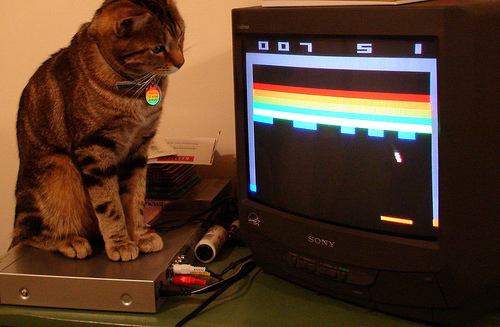

In [69]:
from PIL import Image
Image.open(df_24["image_path"].iloc[i])

In [10]:
import pandas as pd
df_1 = pd.read_csv("/Data2/Arun-UAV/NLP/vision_halu/haloc/haloc_extension/instruct/gemini_labeled_40k.csv")
df_2 = pd.read_csv("/Data2/Arun-UAV/NLP/vision_halu/haloc/haloc_extension/vqa/tp_data.csv")
df_3 = pd.read_csv("/Data2/Arun-UAV/NLP/vision_halu/haloc/haloc_extension/vqa/tn_data.csv")

In [11]:
df_1.head(2)

,image_id,question,answer,candidates,hallucination_candidates,candidates_inx,hallucination_candidates_inx,image_path,question_id
0,2317351.jpg,Describe the color of the hat.,The hat is blue.,"['blue', 'hat']",['blue'],"{'blue': [(11, 15)], 'hat': [(4, 7)]}","{'blue': [(11, 15)]}",/Data2/Arun-UAV/NLP/vision_halu/visual_genome/...,e7f137be-9190-42f0-a1b0-7486e8028fad
1,2317351.jpg,Describe the color of the hat.,The hat is gray.,"['hat', 'gray']",['gray'],"{'hat': [(4, 7)], 'gray': [(11, 15)]}","{'gray': [(11, 15)]}",/Data2/Arun-UAV/NLP/vision_halu/visual_genome/...,c9903799-0507-4102-84fe-3dcd587ae9e0


In [12]:
df_2.head(2)

,image_id,question,answer,hallucination_candidates,candidates,hallucination_candidates_inx,image_path,question_id
0,2411114.jpg,Use the provided image to answer the question:...,left,['left'],[],"{'left': [(0, 4)]}",/Data2/Arun-UAV/NLP/vision_halu/visual_genome/...,afa737f0-d04b-43ab-b2e0-4dc9c0976252
1,2411114.jpg,What is the answer to the following question? ...,fence,['fence'],[],"{'fence': [(0, 5)]}",/Data2/Arun-UAV/NLP/vision_halu/visual_genome/...,6973ae10-8849-467a-8905-d991f5d51ab2


In [13]:
df_3.head(2)

,image_id,question,answer,hallucination_candidates,candidates,candidates_inx,image_path,question_id
0,2411114.jpg,Use the provided image to answer the question:...,right,[],['right'],"{'right': [(0, 5)]}",/Data2/Arun-UAV/NLP/vision_halu/visual_genome/...,c4dd41cb-f3bc-4f7f-b86b-b3bf3b6b2180
1,2411114.jpg,What is the answer to the following question? ...,post,[],['post'],"{'post': [(0, 4)]}",/Data2/Arun-UAV/NLP/vision_halu/visual_genome/...,e03f7633-4eb2-4053-b71b-afa38b5ef2da
